In [5]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np

In [20]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v0/'

In [21]:
maintab = Table.read(tabledir+'vf_north_v0_main.fits')
hatab = Table.read(tabledir+'vf_north_v0_ha.fits')

In [94]:
len(hatab)

6860

In [22]:
radec = (maintab['RA'] > 192.) & (maintab['RA'] < 209) & (maintab['DEC']> 0.) & (maintab['DEC'] < 50.) 
radec_flag = radec & (maintab['DEC'] >(2*(maintab['RA'] - 205.) + 20) ) & (maintab['DEC'] < (2*(maintab['RA'] - 205.) + 55))
filament = radec_flag & (maintab['vr'] >2000.) & (maintab['vr'] < 3238.)

(288.8461025238037, 91.03806037902832, -5.108537805080414, 78.7646659731865)

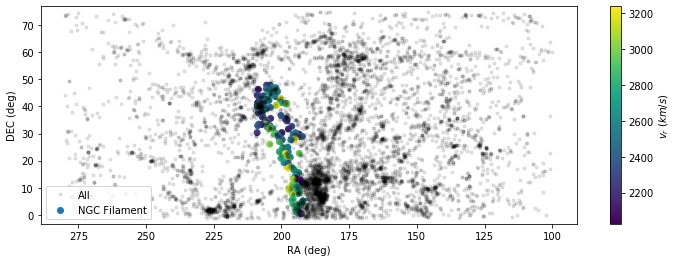

In [93]:
plt.figure(figsize=(12,4))
plt.plot(maintab['RA'],maintab['DEC'],'k.',alpha=.1,label='All')
plt.scatter(maintab['RA'][filament],maintab['DEC'][filament],c=maintab['vr'][filament],label='NGC Filament')
plt.gca().invert_xaxis()
plt.legend()
cb = plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.axis('equal')

# Number of NGC Galaxies with Halpha Data#

In [26]:
ngchaflag = (hatab['haflag'] & filament)
print(sum(ngchaflag))

62


In [76]:
# number of CO galaxies with Halpha
nCO = sum(filament & maintab['COflag'])
nCO_ha = sum(ngchaflag & maintab['COflag'])
print('number of CO galaxies in the filament = ',nCO)
print('number of CO galaxies w/ha in the filament = ',nCO_ha)
print('percent of CO sources w/ha = {:.1f}'.format(nCO_ha/nCO*100))

number of CO galaxies in the filament =  47
number of CO galaxies w/ha in the filament =  35
percent of CO sources w/ha = 74.5


In [78]:
hatab

VFID,RA,DEC,vr,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,NED,RA_ha,DEC_ha,Vr,CO,HI,Halpha,Pointing,Date Obs,Date Obs2,Alt Point,Date Obs3,Filament,Group,Telescope,filter,Dithers,R expt (s),Halpha expt (s),R expt tot,Halpha exp tot,R FWHM (iraf),R FWHM,Ha4 FWHM (iraf),Ha4 FWHM,haflag
bytes8,float32,float32,float32,bytes28,int32,int64,int64,bytes30,bool,bool,bool,bool,bytes12,float64,float64,float64,int64,int64,int64,bytes14,bytes10,bytes10,bytes6,bytes10,int64,int64,bytes9,bytes8,int64,int64,bytes13,int64,int64,float64,float64,float64,float64,bool
VFID0000,185.86877,74.95225,1418.8,NGC4363,0,0,0,NGC 4363,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0001,182.208,74.904274,1331.5,NGC4133,0,0,0,NGC 4133,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0002,145.94466,74.85958,3049.4,NGC2977,0,0,0,NGC 2977,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0003,185.57309,74.83839,1833.0,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0004,182.82774,74.80822,1683.0,UGC07189,0,0,0,UGC 07189,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0005,173.13419,74.62754,1920.1,NGC3752,0,0,0,NGC 3752,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0006,121.91241,74.58463,2333.0,UGC04202,0,0,0,UGC 04202,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0007,118.2363,74.57653,2346.0,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False
VFID0008,274.94318,74.56839,1484.5,NGC6643,0,0,0,NGC 6643,True,False,False,False,N/A,nan,nan,nan,--,--,--,N/A,N/A,N/A,N/A,N/A,--,--,N/A,N/A,--,--,N/A,--,--,nan,nan,nan,nan,False


In [81]:
t = hatab['VFID','NSAIDV0','Date Obs','Pointing','Date Obs2','Telescope'][ngchaflag]
t.write('/home/rfinn/research/Virgo/Halpha/ngcfilament_halpha.fits',format='fits')

(20, 50)

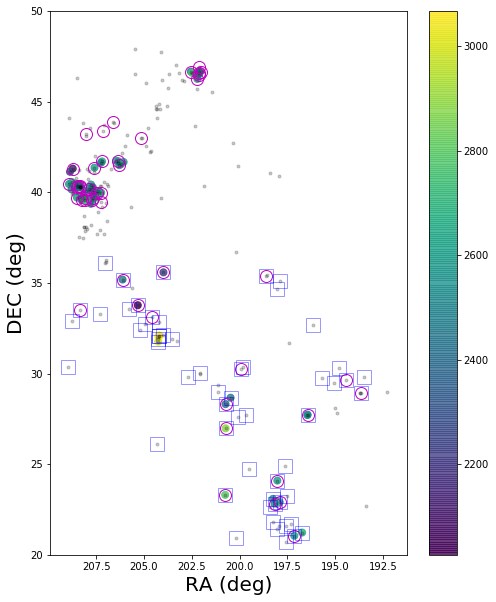

In [61]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2)
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8)
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mo',markersize=12,mfc='None',alpha=1)
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4)
cb = plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.ylim(20,50)

Text(0, 0.5, 'DEC (deg)')

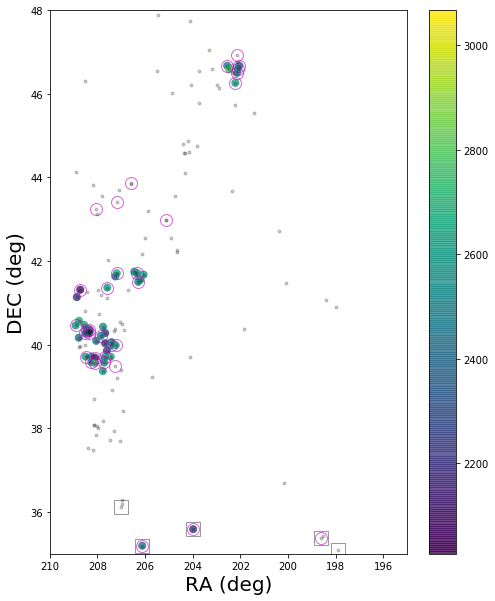

In [70]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2)
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8)
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mo',markersize=12,mfc='None',alpha=.6)
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'ks',markersize=14,mfc='None',alpha=.4)
cb = plt.colorbar()
plt.axis([195,210,35,48])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
